演習課題：サイコロの目の認識AIの構築

dice-03.ipynb : ニューラルネットワークによるサイコロ画像の学習・評価

前半部分は白黒画像を入力とする学習モデルを構築，後半はカラー画像を入力とする学習モデルを構築します

In [3]:
# Google Driveをマウント
#from google.colab import drive
#drive.mount('/content/drive')

# OpenCV imshowサポートパッチのインポート
#from google.colab.patches import cv2_imshow

# ライブラリインポート
import os # ファイル操作関係
import re # 文字列処理
import cv2 # 画像処理
import numpy as np # 配列処理
import datetime
from pytz import timezone
from sklearn.neural_network import MLPClassifier # ニューラルネットワーク（分類モデル）
import joblib # 学習モデル保存
import random # 乱数生成
import matplotlib.pyplot as plt # グラフ描画

['bw-dice-1-20250514-110746.jpg', 'bw-dice-1-20250514-110811.jpg', 'bw-dice-1-20250514-110832.jpg', 'bw-dice-1-20250514-110852.jpg', 'bw-dice-1-20250514-110905.jpg', 'bw-dice-2-20250514-110945.jpg', 'bw-dice-2-20250514-111008.jpg', 'bw-dice-2-20250514-111032.jpg', 'bw-dice-2-20250514-111041.jpg', 'bw-dice-2-20250514-111056.jpg', 'bw-dice-3-20250514-111128.jpg', 'bw-dice-3-20250514-111143.jpg', 'bw-dice-3-20250514-111211.jpg', 'bw-dice-3-20250514-111224.jpg', 'bw-dice-3-20250514-111241.jpg', 'bw-dice-4-20250514-111258.jpg', 'bw-dice-4-20250514-111309.jpg', 'bw-dice-4-20250514-111328.jpg', 'bw-dice-4-20250514-111337.jpg', 'bw-dice-4-20250514-111347.jpg', 'bw-dice-5-20250514-111359.jpg', 'bw-dice-5-20250514-111413.jpg', 'bw-dice-5-20250514-111425.jpg', 'bw-dice-5-20250514-111434.jpg', 'bw-dice-5-20250514-111443.jpg', 'bw-dice-6-20250514-111456.jpg', 'bw-dice-6-20250514-111506.jpg', 'bw-dice-6-20250514-111524.jpg', 'bw-dice-6-20250514-111537.jpg', 'bw-dice-6-20250514-111546.jpg']
File numb

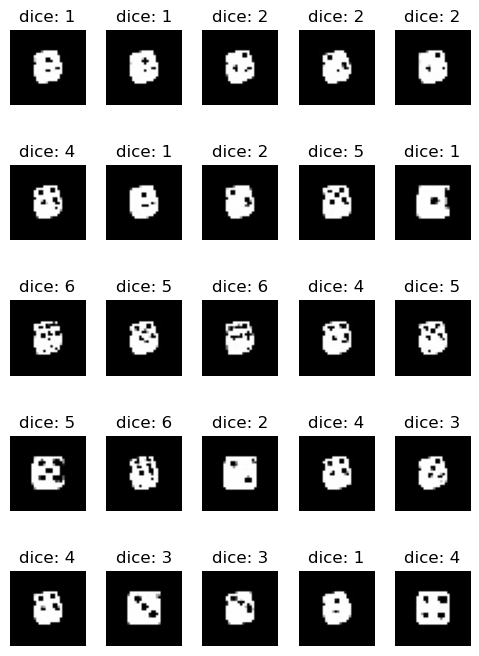

In [4]:
#入力画像サイズ
size_w = 32     # width
size_h = 32     # height

# 現在時刻取得
time_zone = timezone('Asia/Tokyo')
time_now = datetime.datetime.now(time_zone)
save_time = time_now.strftime('%Y%m%d-%H%M%S')
# 学習モデルの保存ファイル名
model_filename = save_time + "NN.pkl"

# x: 入力データベクトル、y：教師データベクトル
x = np.empty((0, size_w * size_h), float)
y = np.array([], int)

# 読み込みフォルダパス
#directory_name = '/content/drive/MyDrive/Colab Notebooks/AI-Kouza/dataset/img_dice_bw/'
directory_name = '../dataset/img_dice_bw/'
# フォルダ内のファイル名を全て取得
file_list = os.listdir(directory_name)
print(file_list)
print('File number: {}'.format(len(file_list)))

# 保存先フォルダが存在しなかったら新規作成
# 学習モデル
#directory_save_model = '/content/drive/MyDrive/Colab Notebooks/AI-Kouza/model_save/'
directory_save_model = '../model_save/'
if not os.path.exists(directory_save_model):
  os.mkdir(directory_save_model)

# 画像データ読み込み
count_load = 0
for i, file_name in enumerate(file_list):
  if re.search('\.jpg', file_name): # jpgファイルのみ処理
    img = cv2.imread(directory_name + file_name, cv2.IMREAD_GRAYSCALE)
    img_vector = np.array([img.ravel()/255.0])
    x = np.append(x, img_vector, axis=0) # 画像（行ベクトル，正規化処理）
    y = np.append(y, file_name[8]) # サイコロ番号
    count_load += 1

print('Loaded: {}'.format(count_load))

# 読み込み画像をランダムに選択して表示 25枚
fig = plt.figure(figsize=(6.0,8.0))
if(count_load < 25):
  for i in range(count_load):
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title("dice: {}".format(y[i]))
    ax.axis( "off" )
    plt.imshow(x[i].reshape(size_h, size_w), cmap="gray")
  plt.subplots_adjust(hspace=0.8)
  plt.show()
else:
  select25 = random.sample(range(0, count_load), 25)
  for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title("dice: {}".format(y[select25[i]]))
    ax.axis( "off" )
    plt.imshow(x[select25[i]].reshape(size_h, size_w), cmap="gray")
  plt.subplots_adjust(hspace=0.8)
  plt.show()

ニューラルネットワークの学習

学習後にlossの変化がグラフで表示されます

Now Learning
Iteration 1, loss = 1.85741686
Iteration 2, loss = 1.71717172
Iteration 3, loss = 1.65229901
Iteration 4, loss = 1.62466433
Iteration 5, loss = 1.59837214
Iteration 6, loss = 1.56287838
Iteration 7, loss = 1.52205192
Iteration 8, loss = 1.48453745
Iteration 9, loss = 1.45080978
Iteration 10, loss = 1.42053526
Iteration 11, loss = 1.39108190
Iteration 12, loss = 1.36121355
Iteration 13, loss = 1.32853336
Iteration 14, loss = 1.29468575
Iteration 15, loss = 1.26123169
Iteration 16, loss = 1.22887724
Iteration 17, loss = 1.19798762
Iteration 18, loss = 1.16810508
Iteration 19, loss = 1.13790499
Iteration 20, loss = 1.10706061
Iteration 21, loss = 1.07517354
Iteration 22, loss = 1.04322706
Iteration 23, loss = 1.01224799
Iteration 24, loss = 0.98255154
Iteration 25, loss = 0.95344232
Iteration 26, loss = 0.92529095
Iteration 27, loss = 0.89739858
Iteration 28, loss = 0.86968504
Iteration 29, loss = 0.84278385
Iteration 30, loss = 0.81641754
Iteration 31, loss = 0.79054390
Iter

C:\Users\sky-energy3\anaconda3\envs\aikouza\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


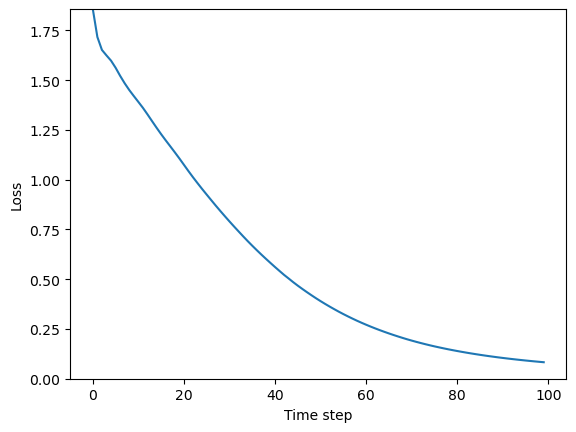

In [5]:
# 学習回数
epochs = 100

# ニューラルネットワークの学習
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=epochs, tol=0.0001, verbose=1)
print('Now Learning')
clf.fit(x, y)
# 学習結果の保存
joblib.dump(clf, directory_save_model + model_filename)
print('学習結果はファイル{0}に保存されました'.format(model_filename))

# 学習損失関数曲線の描画
# 損失関数のグラフの軸ラベルを設定
plt.xlabel('Time step')
plt.ylabel('Loss')
# グラフ縦軸の範囲 0以上loss_curve以下に設定
plt.ylim(0, max(clf.loss_curve_))
# 損失関数の時間変化を描画
plt.plot(clf.loss_curve_)
# 描画したグラフを表示
plt.show()

学習後のモデルの精度（Accuracy）を確認します

ここで使用するデータは学習に用いた画像データです（学習データに対してどれほど学習できているかを確認するため）

結果で表示される画像のTrueは正解のサイコロ番号，Outputはモデルによる分類結果です

Accuracy: 100.000 [%]


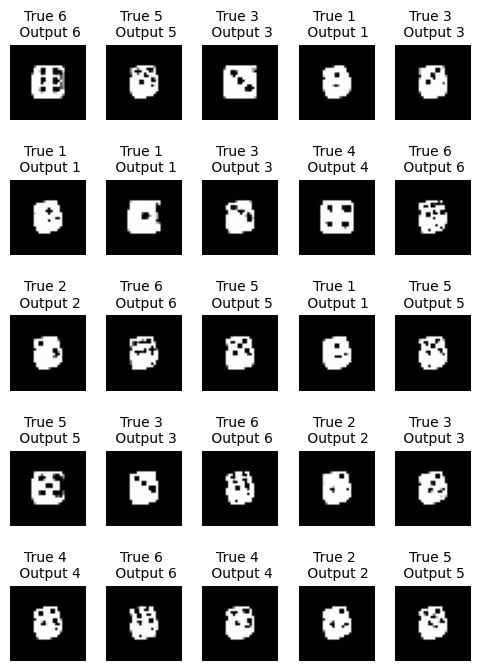

In [6]:
# 学習後モデルの分類精度計算
result = clf.predict(x) # モデル分類結果
total_num = len(x) # データ数
tptn = sum(result == y) # 正解一致数の合計
precision = tptn / total_num # 精度
print("Accuracy: {:.3f} [%]".format(precision*100))

# 読み込み画像をランダムに選択して表示 25枚（分類結果）
fig = plt.figure(figsize=(6.0,8.0))
#plt.title("dice (Learning results)")
if(count_load < 25):
  for i in range(count_load):
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title("True {0} \n Output {1}".format(y[i], result[i]), fontsize=10)
    ax.axis( "off" )
    plt.imshow(x[i].reshape(size_h, size_w), cmap="gray")
  plt.subplots_adjust(hspace=0.8)
  plt.show()
else:
  select25 = random.sample(range(0, count_load), 25)
  for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title("True {0} \n Output {1}".format(y[select25[i]], result[select25[i]]), fontsize=10)
    ax.axis( "off" )
    plt.imshow(x[select25[i]].reshape(size_h, size_w), cmap="gray")
  plt.subplots_adjust(hspace=0.8)
  plt.show()

評価用のデータを読み込んで学習済みモデルの性能を評価します

Loaded: 120
Accuracy (test data): 37.500 [%]


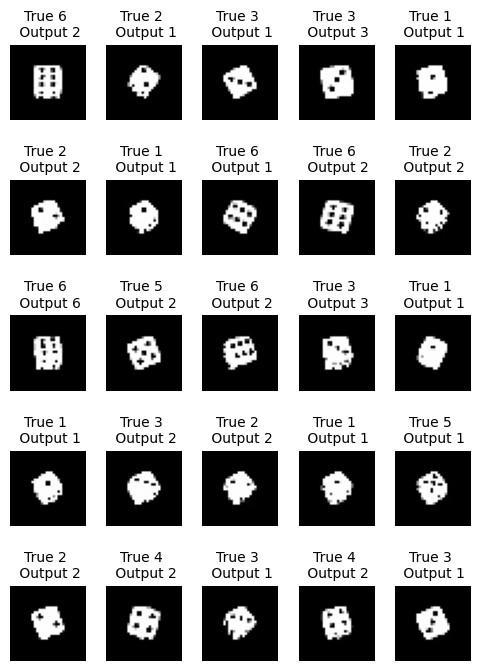

In [7]:
# 読み込みフォルダパス（評価用画像）
#directory_name = '/content/drive/MyDrive/Colab Notebooks/AI-Kouza/dataset/img_dice_bw_test/'
directory_name = '../dataset/img_dice_bw_test/'
# フォルダ内のファイル名を全て取得
file_list = os.listdir(directory_name)

# 画像データ読み込み
count_load_test = 0
x_test = np.empty((0, size_w * size_h), float) # 初期化
y_test = np.array([], int)
for i, file_name in enumerate(file_list):
  if re.search('\.jpg', file_name): # jpgファイルのみ処理
    img = cv2.imread(directory_name + file_name, cv2.IMREAD_GRAYSCALE)
    img_vector = np.array([img.ravel()/255.0])
    x_test = np.append(x_test, img_vector, axis=0) # 画像（行ベクトル，正規化処理）
    y_test = np.append(y_test, file_name[8]) # サイコロ番号
    count_load_test += 1

print('Loaded: {}'.format(count_load_test))

# 学習後モデルの分類精度計算（評価データに対して）
result = clf.predict(x_test) # モデル分類結果
total_num = len(x_test) # データ数
tptn = sum(result == y_test) # 正解一致数の合計
precision = tptn / total_num # 精度
print("Accuracy (test data): {:.3f} [%]".format(precision*100))
#print(total_num)

# 読み込み画像をランダムに選択して表示 25枚（分類結果）
fig = plt.figure(figsize=(6.0,8.0))
#plt.title("dice (Learning results)")
if(count_load_test < 25):
  for i in range(count_load_test):
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title("True {0} \n Output {1}".format(y_test[i], result[i]), fontsize=10)
    ax.axis( "off" )
    plt.imshow(x_test[i].reshape(size_h, size_w), cmap="gray")
  plt.subplots_adjust(hspace=0.8)
  plt.show()
else:
  select25 = random.sample(range(0, count_load_test), 25)
  for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title("True {0} \n Output {1}".format(y_test[select25[i]], result[select25[i]]), fontsize=10)
    ax.axis( "off" )
    plt.imshow(x_test[select25[i]].reshape(size_h, size_w), cmap="gray")
  plt.subplots_adjust(hspace=0.8)
  plt.show()

次は，新たにカラー画像を入力とした場合の学習モデルを構築します

['rgb-dice-1-20250514-110746.jpg', 'rgb-dice-1-20250514-110811.jpg', 'rgb-dice-1-20250514-110832.jpg', 'rgb-dice-1-20250514-110852.jpg', 'rgb-dice-1-20250514-110905.jpg', 'rgb-dice-2-20250514-110945.jpg', 'rgb-dice-2-20250514-111008.jpg', 'rgb-dice-2-20250514-111032.jpg', 'rgb-dice-2-20250514-111041.jpg', 'rgb-dice-2-20250514-111056.jpg', 'rgb-dice-3-20250514-111128.jpg', 'rgb-dice-3-20250514-111143.jpg', 'rgb-dice-3-20250514-111211.jpg', 'rgb-dice-3-20250514-111224.jpg', 'rgb-dice-3-20250514-111241.jpg', 'rgb-dice-4-20250514-111258.jpg', 'rgb-dice-4-20250514-111309.jpg', 'rgb-dice-4-20250514-111328.jpg', 'rgb-dice-4-20250514-111337.jpg', 'rgb-dice-4-20250514-111347.jpg', 'rgb-dice-5-20250514-111359.jpg', 'rgb-dice-5-20250514-111413.jpg', 'rgb-dice-5-20250514-111425.jpg', 'rgb-dice-5-20250514-111434.jpg', 'rgb-dice-5-20250514-111443.jpg', 'rgb-dice-6-20250514-111456.jpg', 'rgb-dice-6-20250514-111506.jpg', 'rgb-dice-6-20250514-111524.jpg', 'rgb-dice-6-20250514-111537.jpg', 'rgb-dice-6-2

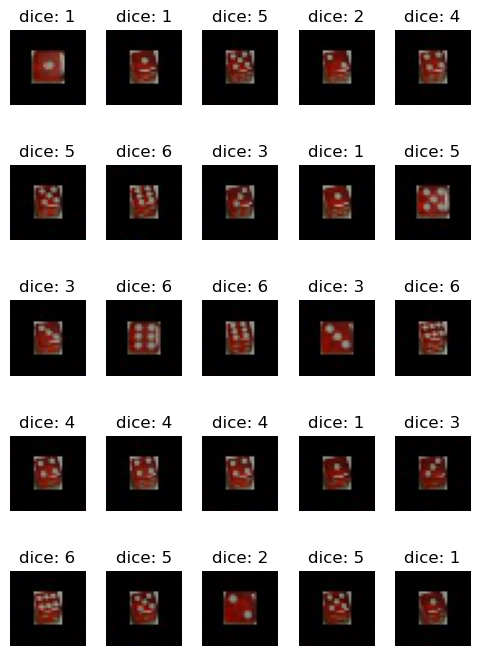

In [8]:
#入力画像サイズ（カラー画像）
size_w = 32     # width
size_h = 32     # height

# 現在時刻取得
time_zone = timezone('Asia/Tokyo')
time_now = datetime.datetime.now(time_zone)
save_time = time_now.strftime('%Y%m%d-%H%M%S')
# 学習モデルの保存ファイル名
model_filename = save_time + "NN-RGB.pkl"

# x: 入力データベクトル、y：教師データベクトル
x = np.empty((0, size_w * size_h * 3), float)
y = np.array([], int)

# 読み込みフォルダパス
#directory_name = '/content/drive/MyDrive/Colab Notebooks/AI-Kouza/dataset/img_dice_rgb/'
directory_name = '../dataset/img_dice_rgb/'
# フォルダ内のファイル名を全て取得
file_list = os.listdir(directory_name)
print(file_list)
print('File number: {}'.format(len(file_list)))

# 保存先フォルダが存在しなかったら新規作成
# 学習モデル
#directory_save_model = '/content/drive/MyDrive/Colab Notebooks/AI-Kouza/model_save/'
directory_save_model = '../model_save/'
if not os.path.exists(directory_save_model):
  os.mkdir(directory_save_model)

# 画像データ読み込み
count_load = 0
for i, file_name in enumerate(file_list):
  if re.search('\.jpg', file_name): # jpgファイルのみ処理
    img = cv2.imread(directory_name + file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_vector = np.array([img.ravel()/255.0])
    x = np.append(x, img_vector, axis=0) # 画像（行ベクトル，正規化処理）
    y = np.append(y, file_name[9]) # サイコロ番号
    count_load += 1

print('Loaded: {}'.format(count_load))

# 読み込み画像をランダムに選択して表示 25枚
fig = plt.figure(figsize=(6.0,8.0))
if(count_load < 25):
  for i in range(count_load):
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title("dice: {}".format(y[i]))
    ax.axis( "off" )
    plt.imshow(x[i].reshape(size_h, size_w, 3))
  plt.subplots_adjust(hspace=0.8)
  plt.show()
else:
  select25 = random.sample(range(0, count_load), 25)
  for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title("dice: {}".format(y[select25[i]]))
    ax.axis( "off" )
    plt.imshow(x[select25[i]].reshape(size_h, size_w, 3))
  plt.subplots_adjust(hspace=0.8)
  plt.show()

ニューラルネットワークの学習（カラー画像版）

学習後にlossの変化がグラフで表示されます

Now Learning
Iteration 1, loss = 1.80228724
Iteration 2, loss = 1.72779411
Iteration 3, loss = 1.66830229
Iteration 4, loss = 1.61181326
Iteration 5, loss = 1.55307083
Iteration 6, loss = 1.49663305
Iteration 7, loss = 1.43879560
Iteration 8, loss = 1.38220859
Iteration 9, loss = 1.32621515
Iteration 10, loss = 1.27081024
Iteration 11, loss = 1.21550309
Iteration 12, loss = 1.16055476
Iteration 13, loss = 1.10789825
Iteration 14, loss = 1.05590562
Iteration 15, loss = 1.00503134
Iteration 16, loss = 0.95525998
Iteration 17, loss = 0.90696182
Iteration 18, loss = 0.86078121
Iteration 19, loss = 0.81590006
Iteration 20, loss = 0.77194869
Iteration 21, loss = 0.72934365
Iteration 22, loss = 0.68896154
Iteration 23, loss = 0.65021993
Iteration 24, loss = 0.61364180
Iteration 25, loss = 0.57890319
Iteration 26, loss = 0.54561142
Iteration 27, loss = 0.51398522
Iteration 28, loss = 0.48407356
Iteration 29, loss = 0.45581912
Iteration 30, loss = 0.42899076
Iteration 31, loss = 0.40366304
Iter

C:\Users\sky-energy3\anaconda3\envs\aikouza\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


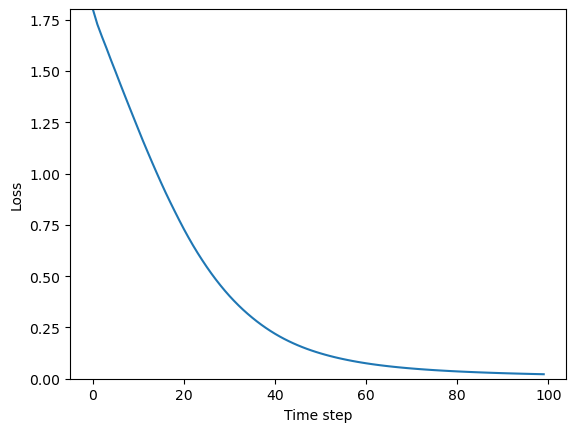

In [9]:
# 学習回数
epochs = 100

# ニューラルネットワークの学習
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=epochs, tol=0.0001, verbose=1)
print('Now Learning')
clf.fit(x, y)
# 学習結果の保存
joblib.dump(clf, directory_save_model + model_filename)
print('学習結果はファイル{0}に保存されました'.format(model_filename))

# 学習損失関数曲線の描画
# 損失関数のグラフの軸ラベルを設定
plt.xlabel('Time step')
plt.ylabel('Loss')
# グラフ縦軸の範囲 0以上loss_curve以下に設定
plt.ylim(0, max(clf.loss_curve_))
# 損失関数の時間変化を描画
plt.plot(clf.loss_curve_)
# 描画したグラフを表示
plt.show()

カラー画像データの学習後のモデルの精度（Accuracy）を確認します

ここで使用するデータは学習に用いた画像データです（学習データに対してどれほど学習できているかを確認するため）

結果で表示される画像のTrueは正解のサイコロ番号，Outputはモデルによる分類結果です


Accuracy: 100.000 [%]


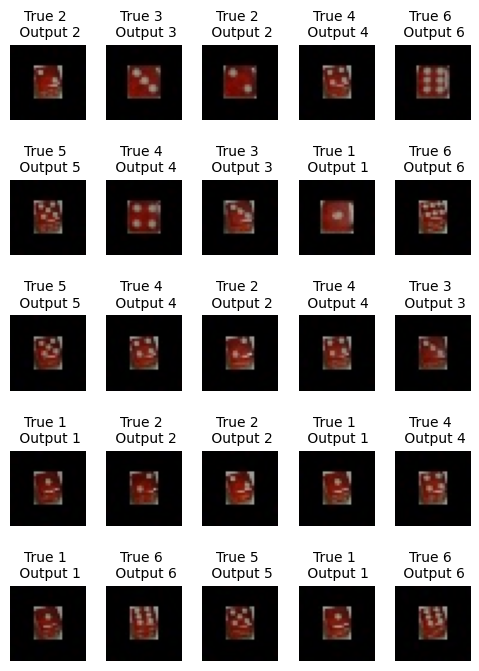

In [115]:
# 学習後モデルの分類精度計算（カラー画像版）
result = clf.predict(x) # モデル分類結果
total_num = len(x) # データ数
tptn = sum(result == y) # 正解一致数の合計
precision = tptn / total_num # 精度
print("Accuracy: {:.3f} [%]".format(precision*100))

# 読み込み画像をランダムに選択して表示 25枚（分類結果）
fig = plt.figure(figsize=(6.0,8.0))
if(count_load < 25):
  for i in range(count_load):
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title("True {0} \n Output {1}".format(y[i], result[i]), fontsize=10)
    ax.axis( "off" )
    plt.imshow(x[i].reshape(size_h, size_w, 3))
  plt.subplots_adjust(hspace=0.8)
  plt.show()
else:
  select25 = random.sample(range(0, count_load), 25)
  for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title("True {0} \n Output {1}".format(y[select25[i]], result[select25[i]]), fontsize=10)
    ax.axis( "off" )
    plt.imshow(x[select25[i]].reshape(size_h, size_w, 3))
  plt.subplots_adjust(hspace=0.8)
  plt.show()

カラー画像の評価用のデータを読み込んで学習済みモデルの性能を評価します

Loaded: 120
Accuracy (test data): 34.167 [%]


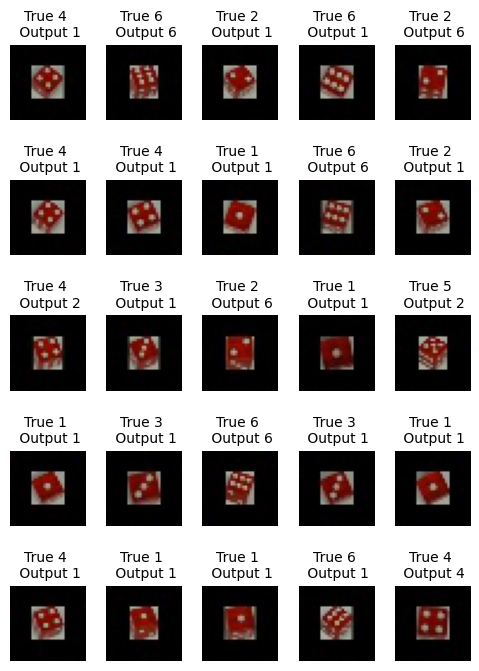

In [10]:
# 読み込みフォルダパス（評価用カラー画像）
#directory_name = '/content/drive/MyDrive/Colab Notebooks/AI-Kouza/dataset/img_dice_rgb_test/'
directory_name = '../dataset/img_dice_rgb_test/'
# フォルダ内のファイル名を全て取得
file_list = os.listdir(directory_name)

# 画像データ読み込み
count_load_test = 0
x_test = np.empty((0, size_w * size_h * 3), float) # 初期化
y_test = np.array([], int)
for i, file_name in enumerate(file_list):
  if re.search('\.jpg', file_name): # jpgファイルのみ処理
    img = cv2.imread(directory_name + file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_vector = np.array([img.ravel()/255.0])
    x_test = np.append(x_test, img_vector, axis=0) # 画像（行ベクトル，正規化処理）
    y_test = np.append(y_test, file_name[9]) # サイコロ番号
    count_load_test += 1

print('Loaded: {}'.format(count_load_test))


# 学習後モデルの分類精度計算（評価データに対して）
result = clf.predict(x_test) # モデル分類結果
total_num = len(x_test) # データ数
tptn = sum(result == y_test) # 正解一致数の合計
precision = tptn / total_num # 精度
print("Accuracy (test data): {:.3f} [%]".format(precision*100))

# 読み込み画像をランダムに選択して表示 25枚（分類結果）
fig = plt.figure(figsize=(6.0,8.0))
#plt.title("dice (Learning results)")
if(count_load_test < 25):
  for i in range(count_load_test):
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title("True {0} \n Output {1}".format(y_test[i], result[i]), fontsize=10)
    ax.axis( "off" )
    plt.imshow(x_test[i].reshape(size_h, size_w, 3))
  plt.subplots_adjust(hspace=0.8)
  plt.show()
else:
  select25 = random.sample(range(0, count_load_test), 25)
  for i in range(25):
    ax = fig.add_subplot(5, 5, i+1)
    ax.set_title("True {0} \n Output {1}".format(y_test[select25[i]], result[select25[i]]), fontsize=10)
    ax.axis( "off" )
    plt.imshow(x_test[select25[i]].reshape(size_h, size_w, 3))
  plt.subplots_adjust(hspace=0.8)
  plt.show()